## 作業



閱讀以下兩篇文獻，了解決策樹原理，並試著回答後續的問題
- [決策樹 (Decision Tree) - 中文](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda)
- [how decision tree works - 英文](http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/)

1. 在分類問題中，若沒有任何限制，決策樹有辦法在訓練時將 training loss 完全降成 0 嗎？
2. 決策樹只能用在分類問題嗎？還是可以用來解決回歸問題？


1. 可以
2. 不是，可以處理回歸問題 

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, decision tree algorithm can be used for solving regression and classification problems too.

回歸樹 https://zh.wikipedia.org/wiki/%E5%86%B3%E7%AD%96%E6%A0%91%E5%AD%A6%E4%B9%A0

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'],columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'],columns=['target'])
iris_data = pd.concat([x,y],axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


將資料的70%拿出來train，剩下的30％用來檢測train的好壞

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data[['target']],test_size=0.3,random_state=0)

載入決策樹函式，criterion使用我們前面介紹的entropy，也可以使用gini impurity，max_depth在實務上很常用到，主要是可以防止樹長得過高造成overfit，由於這個範例很簡單不設max_depth也可以正確分類

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

寫個迴圈看一下預測結果，發現也全部預測正確了！另外也可以用score函數來計算正確率

In [6]:
tree.predict(X_test)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [7]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [8]:
error= 0
for i,v in enumerate(tree.predict(X_test)):
    if v != y_test['target'].values[i]:
        print(i,v)
        error +=1
print(error)

0


In [9]:
tree.score(X_test,y_test['target'])

1.0

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,text_idx=None,resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','v','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decison surface
    x1_min, x1_max = X[:,0].min()-1, X[:,1].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx ,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                    alpha=0.6,
                    c =cmap.colors[idx],
                    edgecolor = 'black',
                    marker = markers[idx],
                    label = cl)  

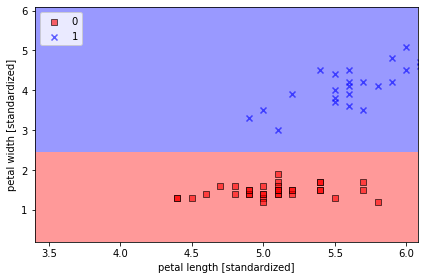

In [11]:
plot_decision_regions(X_train.values, y_train['target'].values, classifier=tree)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='Day_041_Document/tree.dot', feature_names=['sepal length (cm)','petal length (cm)'])